In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Explanation of Columns in the dataset
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST   elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Exploratory Data Analysis

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset contains only non-null values, so we don't have to deal with missing values

In [7]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

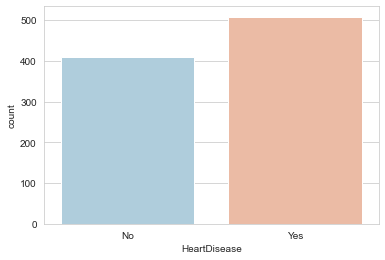

In [11]:
#checking if the dataset is balanced or not
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

Seems like a balanced dataset

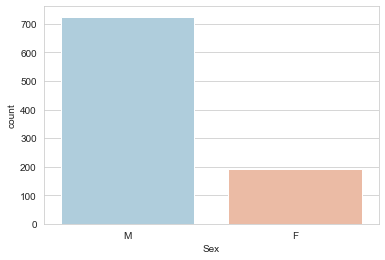

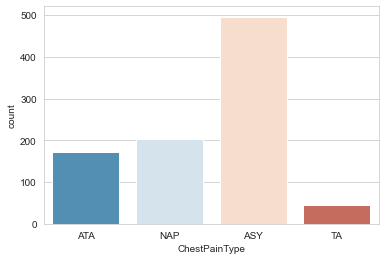

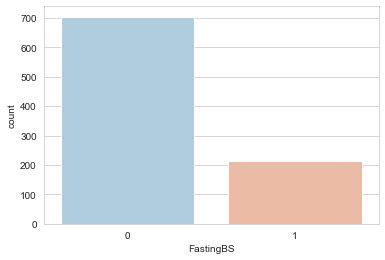

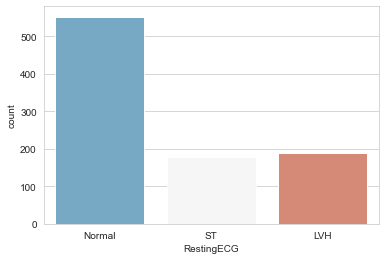

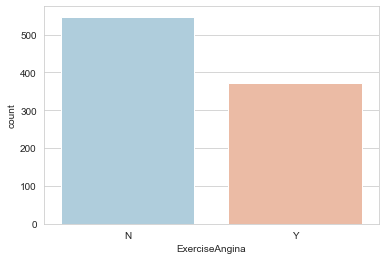

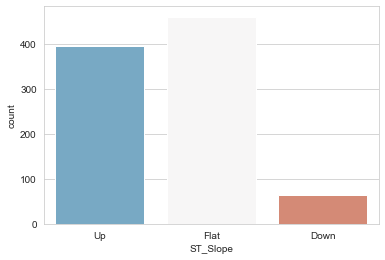

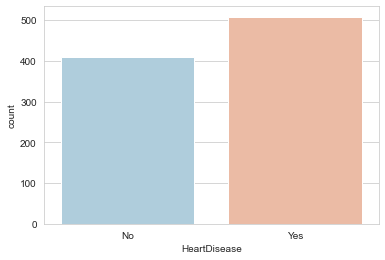

In [12]:
for column in categorical_columns:
    sns.set_style('whitegrid')
    sns.countplot(x=column,data=df,palette='RdBu_r')
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

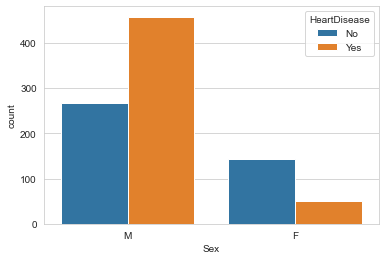

In [13]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)

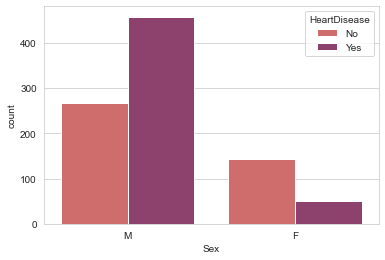

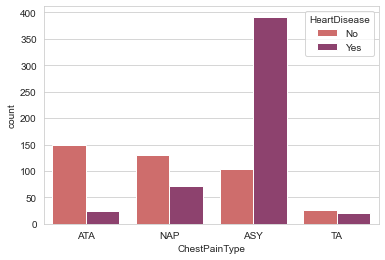

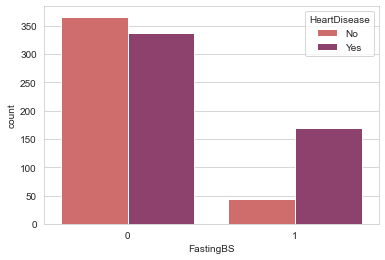

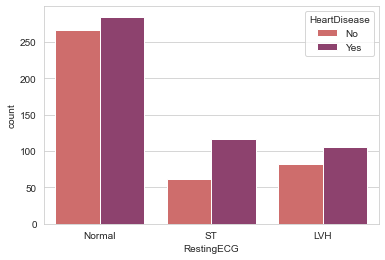

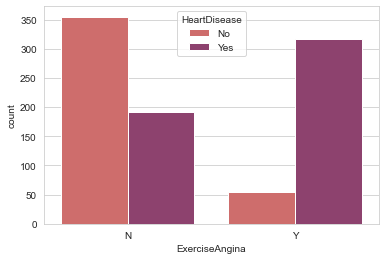

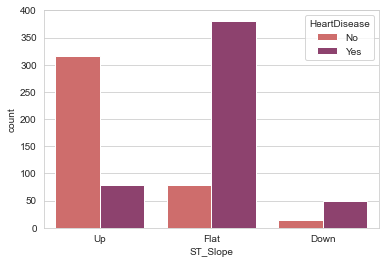

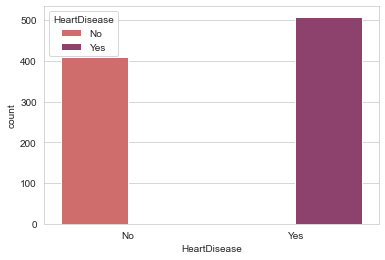

In [14]:
for column in categorical_columns:
    sns.countplot(x=column, hue='HeartDisease', data=df, palette="flare")
    plt.show()

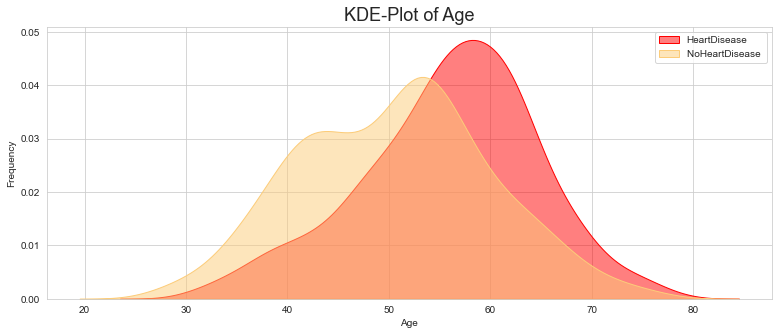

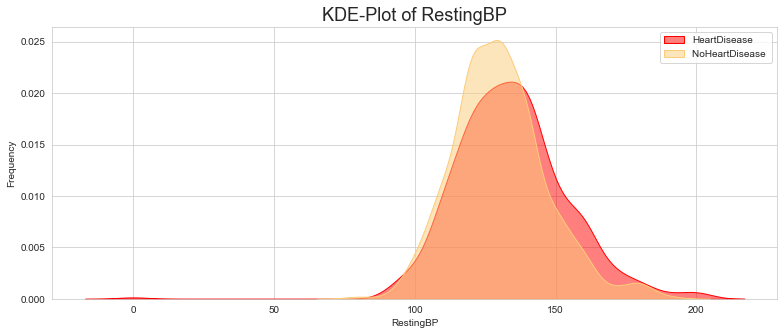

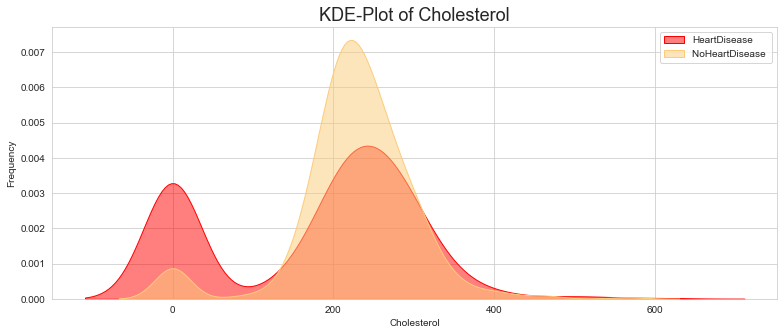

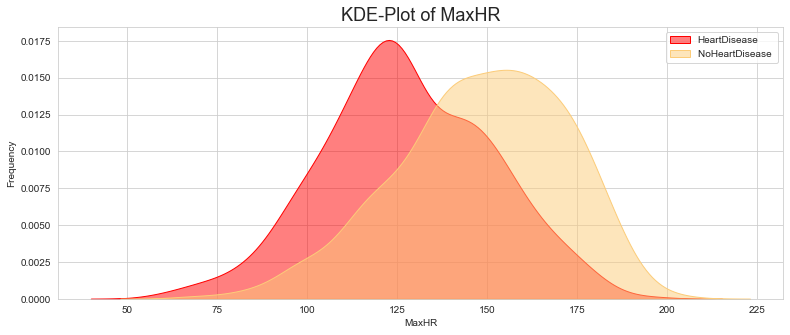

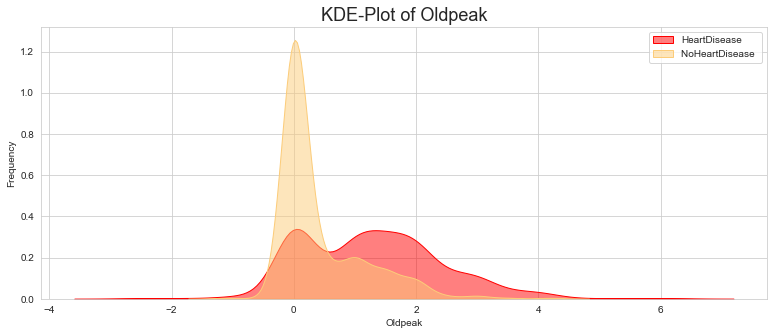

In [15]:
for column in numerical_columns:
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df['HeartDisease']=='Yes'][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)  
    sns.kdeplot(df[df['HeartDisease']=='No'][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)  
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()


📍 Age :
- Average Age is 53.
- Maximum Age is 77
- Minimum Age is 28
- Most of heart disease Patients have age between 55 and 65

📍 OldPeak :
- Old peak = ST depression induced by exercise relative to rest
- Average OldPeak is 0.88
- Maximum OldPeak is 6.2
- Minimum OldPeak is -2.6
- Most patients with 0 oldpeak, don't have Heart disease

📍 Cholesterol :
- For person aged 20 years and older, the Cholesterol level should be between 125 and 200 mg/dL.
- Average Cholesterol is 198.7 mg/dl
- Maximum is 603 >>> 200 mg/dl
- Minimum Cholesterol is 0 => Cholesterol should be != 0

📍 MaxHR :
- There are a number of formulas out there for calculating max heart rate. The easiest and most commonly used one is to simply subtract your age from 220. So if you're 40 years old, your max heart rate would be 180 bpm. Source
- Average MaxHR is 136. Age average is 53 so based of this formula the MaxHR average will be around 167
- Maximum is 202 >> 162
- Minimum MaxHR is 60 => So 220 - 60 = Age = 160 years old ! hmm 🤔
- Based on the formula it does not make any logic (the oldest man in the world is 119 years old 😁 )
- MaxHR : Calculate your resting heart rate by counting how many times your heart beats per minute when you are at rest, such as first thing in the morning. It's usually somewhere between 60 and 100 beats per minute for the average adult.
- So 60 can be a result of calculation with another formula
- Most of tested patients with heart disease have around 120 maxHR

📍 RestingBP :
- A normal blood pressure level is around 120/80 mmHg..
- Minimum is 0 => Must be an outlier data
- Maximum blood pressure is 200
- Most tested Patients have RestingBP between 120 and 150

## Feature Engineering

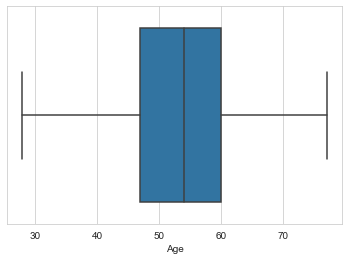

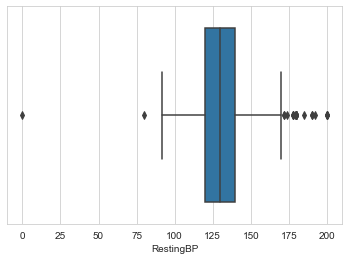

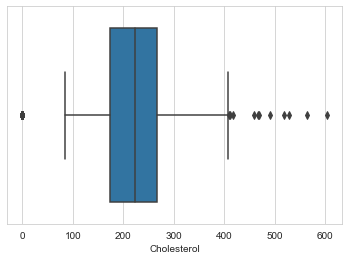

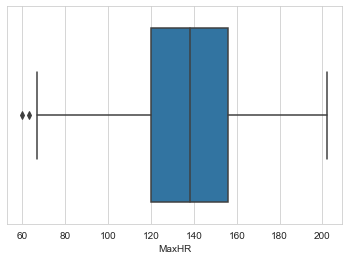

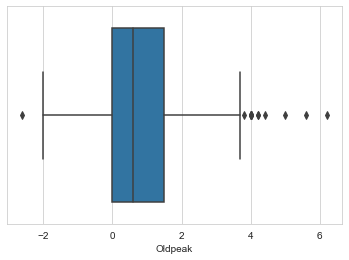

In [16]:
#Handling Outliers
for column in numerical_columns: 
    ax = sns.boxplot(x=df[column])
    plt.show()

In [17]:
df1 = df[df.Cholesterol != 0]
df1 = df1[df1.RestingBP > 70]

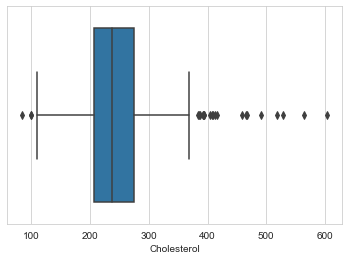

In [18]:
 ax = sns.boxplot(x=df1["Cholesterol"])

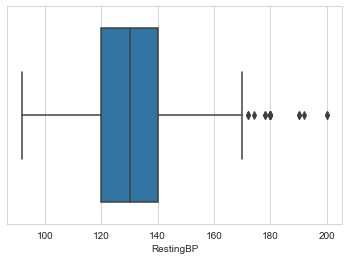

In [19]:
 ax = sns.boxplot(x=df1["RestingBP"])

### One Hot Encoding & Scaling

In [20]:
final_df = pd.get_dummies(df1, columns=categorical_columns[:-1])

In [21]:
final_df['HeartDisease'] = final_df['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})

In [22]:
X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']

In [23]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
X_scaled

array([[-1.35607325,  0.40398044,  0.7504942 , ..., -0.24731848,
        -0.95029534,  1.06655324],
       [-0.40865641,  1.5619801 , -1.09340492, ..., -0.24731848,
         1.05230444, -0.9375997 ],
       [-1.67187886, -0.17501939,  0.64899516, ..., -0.24731848,
        -0.95029534,  1.06655324],
       ...,
       [ 0.43349189, -0.17501939, -1.92231369, ..., -0.24731848,
         1.05230444, -0.9375997 ],
       [ 0.43349189, -0.17501939, -0.1460806 , ..., -0.24731848,
         1.05230444, -0.9375997 ],
       [-1.56661032,  0.28818048, -1.17798745, ..., -0.24731848,
        -0.95029534,  1.06655324]])

In [24]:
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [25]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: category
Categories (2, int64): [0, 1]

# Modeling
Let's build some simple models provided by Scikit learn library :
- Logistic Regression
- K Nearest Neighbors
- Support Vectors
- Decision Tree
- Random Forest
- Naive Bayes

In [26]:
#Splitting data
from sklearn.model_selection import train_test_split
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [29]:
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

In [30]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.903743,0.877778,0.918605,0.897727
Naive Bayes,0.887701,0.866667,0.896552,0.881356
Support Vector Machines,0.882353,0.866667,0.886364,0.876404
K-Nearest Neighbor,0.882353,0.911111,0.854167,0.881720
Logistic Regression,0.871658,0.844444,0.883721,0.863636
Decision Trees,0.786096,0.744444,0.797619,0.770115


We can see that our Random Forest model tops the other models in almost all the metrics , except precision. So Random Forest is our base model

## Model Optimisation

optimising our RandomForest model by tuning the hyper parameters available from the scikit-learn library. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

In [31]:
# Create a default model
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}
# Create a base model
rf_random = RandomForestClassifier(random_state=0)

# Initiate the grid search model
rf_search = RandomizedSearchCV(estimator=rf_random, param_distributions=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1)
# Fit the grid search to the data
rf_fit = rf_search.fit(X_train, y_train)
best_parameters = rf_fit.best_params_

In [36]:
# Show the best params of grid search
best_parameters

{'n_estimators': 750,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 4,
 'max_depth': 50}

In [37]:
best_classifier = RandomForestClassifier(n_estimators=750, max_depth=50, min_samples_leaf=4, min_samples_split=10,max_features=4)
best_classifier.fit(X_train, y_train)
predictions = best_classifier.predict(X_test)

In [38]:
accuracy_score(predictions, y_test)

0.9090909090909091

In [39]:
recall_score(predictions, y_test)

0.8924731182795699

In [40]:
precision_score(predictions, y_test)

0.9222222222222223

In [42]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[87 10]
 [ 7 83]]


In [44]:
# Difference Accuracy, Precision and Recall Metrics
dif_accuracy = accuracy_score(predictions, y_test) - list(accuracy.values())[3]
dif_precision = precision_score(predictions, y_test) - list(precision.values())[3]
dif_recall = recall_score(predictions, y_test)- list(recall.values())[3]
dif_f1_score = f1_score(predictions, y_test) - list(f1.values())[3]

In [46]:
print(" Change of {:.3f}% on Accuracy.".format(dif_accuracy*100))
print(" Change of {:.3f}% on Precision.".format(dif_precision*100))
print(" Change of {:.3f}% on Recall.".format(dif_recall*100))
print(" Change of {:.3f}% on F1 Score.\n".format(dif_f1_score*100))

 Change of 0.535% on Accuracy.
 Change of 4.444% on Precision.
 Change of -2.613% on Recall.
 Change of 0.938% on F1 Score.



The optimised model show an increase in 3 out of the 4 metrics but did not perform well in the other one, which is the recall

The recall is the measure of our model correctly identifying True Positives ✅ . Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.

👉 We want to focus on predicting as many actual positive values as possible we should stick with our original model for the prediction because it has higher recall score.